# Project 1: Exploratory Data Analysis (EDA)

#### Backstory
WomenTechWomenYes (WTWY) has an annual gala at the beginning of the summer each year. The organization wants to fill its event space with individuals passionate about increasing the participation of women in technology, and to concurrently build awareness and reach.

To this end WTWY will place street teams at entrances to subway stations. The street teams collect email addresses and those who sign up are sent free tickets to our gala.

#### Goal
In order to assist WTWY with attendance for the gala and engagement with the organization's mission, we will use MTA subway data to help us optimize the placement of the street teams so that the most signatures are gathered, ideally from those who will attend the gala and contribute to WTWY's cause.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [33]:
import datetime

#### Challenge 1.1
* Open up a new Jupyter notebook
* Download a few MTA turnstile data files
* Load the files into a pandas DataFrame (hint: pd.read_csv() to load files and pd.concat() to combine DataFrames)

Read the data into six separate dataframes and concatenate the data into one dataframe.

In [34]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200606, 200530, 200411, 200321, 200208, 200118]
turnstiles_df = get_data(week_nums)

In [35]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [36]:
# Check to see if column names have any leading or trailing whitespace or unwanted characters
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [37]:
# Remove whitespace from the EXITS column
turnstiles_df.columns = turnstiles_df.columns.str.strip()

In [38]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [39]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [40]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205616,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,04:00:00,REGULAR,5554,420
205617,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,08:00:00,REGULAR,5554,420
205618,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,12:00:00,REGULAR,5554,420
205619,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,16:00:00,REGULAR,5554,420
205620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,20:00:00,REGULAR,5554,420


#### Challenge 1.2
* Let's turn this into a time series.
* Our pandas dataframe has columns called Date and Time (what datatype did pandas assign to these columns on import?), however in python and pandas we can convert date and time information to datetime objects, which allow us to do time-based operations
* Using either pd.to_datetime in pandas or the python datetime library, combine the Date and Time columns into a single new column of the datetime datatype

The DATE and TIME columns are object datatypes, which in Pandas is a string. We want to convert them to a single datetime object.

In [41]:
from datetime import datetime as dt

In [42]:
print('DATE datatype: {}, TIME datatype: "{}"'.format(turnstiles_df['DATE'].dtypes, turnstiles_df['TIME'].dtypes))

DATE datatype: object, TIME datatype: "object"


In [43]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

After conversion, the datatype for the DATE_TIME column is a datetime.

In [44]:
turnstiles_df['DATE_TIME'].dtypes

dtype('<M8[ns]')

In [45]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


Before moving on to Challenge 3, we want to check for duplicate entries.

In [46]:
# Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
187403,H001,R175,00-00-02,8 AV,2020-02-01 00:00:00,2
233112,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
828378,R141,R031,00-03-01,34 ST-PENN STA,2020-03-18 16:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [47]:
# On 2/1, we have two entries for the same time.
mask = ((turnstiles_df["C/A"] == "H001") & 
(turnstiles_df["UNIT"] == "R175") & 
(turnstiles_df["SCP"] == "00-00-02") & 
(turnstiles_df["STATION"] == "8 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 2, 1).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
30865,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,00:00:00,REGULAR,16366480,9248547,2020-02-01 00:00:00
30866,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,00:00:00,RECOVR AUD,2625,6503,2020-02-01 00:00:00
30867,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,04:00:00,REGULAR,16366619,9248579,2020-02-01 04:00:00
30868,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,08:00:00,REGULAR,16366671,9248643,2020-02-01 08:00:00
30869,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,12:00:00,REGULAR,16366813,9248865,2020-02-01 12:00:00


The duplicate value can be seen in the DESC column as a "RECOVR AUD." The column itself refers to the regularly scheduled audit events which take place every 4 hours. However, occasionally a missed audit is recovered and is logged under a different identifier. While not all RECOVR AUD values are duplicates, the two we identified are.

In [48]:
# We also have duplicate entries for 5/27.
mask = ((turnstiles_df["C/A"] == "J009") & 
(turnstiles_df["UNIT"] == "R378") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "MYRTLE AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 5, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
40877,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,01:00:00,REGULAR,3047244,2109618,2020-05-27 01:00:00
40878,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,REGULAR,3047247,2109623,2020-05-27 05:00:00
40879,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,RECOVR AUD,3047246,2109623,2020-05-27 05:00:00
40880,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,09:00:00,REGULAR,3047363,2109697,2020-05-27 09:00:00
40881,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,13:00:00,REGULAR,3047424,2109765,2020-05-27 13:00:00


In [49]:
turnstiles_df.DESC.value_counts()

REGULAR       1237883
RECOVR AUD       4690
Name: DESC, dtype: int64

We'll now remove the duplicates entries.

In [50]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [51]:
# Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-01-11 03:00:00,1
828387,R141,R031,00-03-01,34 ST-PENN STA,2020-03-20 04:00:00,1
828385,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 20:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [52]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### Challenge 1.3
* Each row is a turnstile, identified by a combination of the C/A, UNIT, SCP, and STATION columns, with information on entries and exits at that turnstile every n hours. (What is n?) We want total daily entries.
* Group the data so that it represents daily entries for each turnstile (hint: pd.groupby or DataFrame.groupby)

In [53]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "LINENAME", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [54]:
turnstiles_daily.head()

,C/A,UNIT,SCP,LINENAME,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,NQR456W,59 ST,01/11/2020,7340476
1,A002,R051,02-00-00,NQR456W,59 ST,01/12/2020,7341214
2,A002,R051,02-00-00,NQR456W,59 ST,01/13/2020,7342558
3,A002,R051,02-00-00,NQR456W,59 ST,01/14/2020,7343865
4,A002,R051,02-00-00,NQR456W,59 ST,01/15/2020,7345249


In [55]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .apply(lambda grp: grp.shift(1)))

In [56]:
turnstiles_daily.head()

,C/A,UNIT,SCP,LINENAME,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,NQR456W,59 ST,01/11/2020,7340476,NaN,NaN
1,A002,R051,02-00-00,NQR456W,59 ST,01/12/2020,7341214,01/11/2020,7340476.0
2,A002,R051,02-00-00,NQR456W,59 ST,01/13/2020,7342558,01/12/2020,7341214.0
3,A002,R051,02-00-00,NQR456W,59 ST,01/14/2020,7343865,01/13/2020,7342558.0
4,A002,R051,02-00-00,NQR456W,59 ST,01/15/2020,7345249,01/14/2020,7343865.0


In [57]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,LINENAME,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
206588,TRAM2,R469,00-05-01,R,RIT-ROOSEVELT,06/01/2020,5554,05/31/2020,5554.0
206589,TRAM2,R469,00-05-01,R,RIT-ROOSEVELT,06/02/2020,5554,06/01/2020,5554.0
206590,TRAM2,R469,00-05-01,R,RIT-ROOSEVELT,06/03/2020,5554,06/02/2020,5554.0
206591,TRAM2,R469,00-05-01,R,RIT-ROOSEVELT,06/04/2020,5554,06/03/2020,5554.0
206592,TRAM2,R469,00-05-01,R,RIT-ROOSEVELT,06/05/2020,5554,06/04/2020,5554.0


In [58]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

We'll now filter to try to find more areas of the data that do not make since. Here we're trying to find entries that are less than their previous value.

In [59]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,LINENAME,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
476,A002,R051,02-06-00,NQR456W,59 ST,03/14/2020,35096,02/07/2020,76716.0
686,A006,R079,00-00-04,NQRW,5 AV/59 ST,05/23/2020,1258,04/10/2020,7896758.0
714,A006,R079,00-03-00,NQRW,5 AV/59 ST,03/14/2020,2330,02/07/2020,9410826.0
1060,A007,R079,01-06-03,NQRW,5 AV/59 ST,04/07/2020,4,04/06/2020,7832194.0
1625,A011,R080,01-03-00,NQRW,57 ST-7 AV,01/12/2020,885732015,01/11/2020,885732453.0


In [60]:
# Let's see how many stations have this problem
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST               1
A006   R079  00-00-04  5 AV/59 ST          1
             00-03-00  5 AV/59 ST          1
A007   R079  01-06-03  5 AV/59 ST          1
A011   R080  01-03-00  57 ST-7 AV         41
                                          ..
R629   R065  00-03-00  ROCKAWAY AV         1
R639   R109  00-05-02  CHURCH AV           1
R729   R292  00-00-01  BAYCHESTER AV       1
R730   R431  00-00-04  EASTCHSTER/DYRE    41
TRAM1  R468  00-00-01  RIT-MANHATTAN       1
Length: 288, dtype: int64

In [61]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1258 7896758.0
2330 9410826.0
4 7832194.0
1687 1562921047.0
848 1180101.0
4875 7244466.0
5305 1196338.0
43 6777224.0
17224 1083160.0
294 6612092.0
107 8235039.0
2033924 364303.0
36 5666890.0
25 8800439.0
475952125 7379372.0
2920 3114791.0
618862 2624193.0
17126450 19676957.0
15066625 17126282.0
25528773 15065804.0
12316490 25525671.0
72 1015375.0
1616 2632946.0
2800 3567412.0
13865 6119754.0
49 8294808.0
15 2090862.0
18 168627933.0
1175 4733498.0
83886121 22940.0
16965 11957933.0
2937635 79502.0
321184286 5589416.0
307624182 321184285.0
673 4895014.0
32 1317615.0
4785471 11470775.0
47325 4829073.0
6031 2011827.0
270537780 536177.0
2323 13973128.0
1062 2302008.0
3139 2405464.0
395233 2064683.0
111220 6561938.0
2010 22737699.0
18023 3853709.0
524538 118139950.0
14336 69155900.0
4410 9499451.0
8988 8436536.0
2863 1936022.0
25316 1476413.0
1245971397 2299884.0
1779 3529732.0
60 7675482.0
8369771 1820899.0
578409 2805680.0
2162 9037638.0
3779 1501563.0
1627393907 6366854.0
203 1408008.0
12 

In [79]:
turnstiles_daily.to_csv(r'C:/Users/willnobles/Documents/metis/Project1/Project1/turnstiles_daily.csv', index=False, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/willnobles/Documents/metis/Project1/Project1/turnstiles_daily.csv'

In [63]:
turnstiles_daily.head()

,C/A,UNIT,SCP,LINENAME,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,NQR456W,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0
2,A002,R051,02-00-00,NQR456W,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0
3,A002,R051,02-00-00,NQR456W,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0
4,A002,R051,02-00-00,NQR456W,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0
5,A002,R051,02-00-00,NQR456W,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0


In [64]:
turnstiles_daily.describe()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
count,2.016190e+05,2.016190e+05,201619.000000
mean,4.296167e+07,4.293308e+07,1869.509714
std,2.193357e+08,2.192549e+08,11913.367417
min,0.000000e+00,0.000000e+00,0.000000
25%,3.070585e+05,3.071950e+05,37.000000
50%,1.882306e+06,1.884828e+06,181.000000
75%,6.505078e+06,6.507020e+06,759.000000
max,2.128871e+09,2.128872e+09,999904.000000


In [65]:
turnstiles_daily.DAILY_ENTRIES.median()

181.0

#### Challenge 1.4
We will plot the daily time series for a single turnstile.

In ipython notebook, add this to the beginning of your next cell:

```python
%matplotlib inline
```
This will make your matplotlib graphs integrate nicely with the notebook.

To plot the time series, import matplotlib with

```python
import matplotlib.pyplot as plt
```

Select one turnstile (combination of [C/A, UNIT, SCP, STATION]). Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days). Using matplotlib, create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis
You can use the following as a starting point:

```python
plt.figure(figsize=(10,3))
plt.plot(<days>,<entries>)
```

In [66]:
%matplotlib inline

import matplotlib.pyplot as plt

In [67]:
# filter for a single turnstile
single_ts = turnstiles_daily.loc[(turnstiles_daily['C/A'] == 'A002') &
                                (turnstiles_daily['UNIT'] == 'R051') &
                                (turnstiles_daily['SCP'] == '02-00-00') &
                                (turnstiles_daily['STATION'] == '59 ST')]

single_ts.shape

(41, 10)

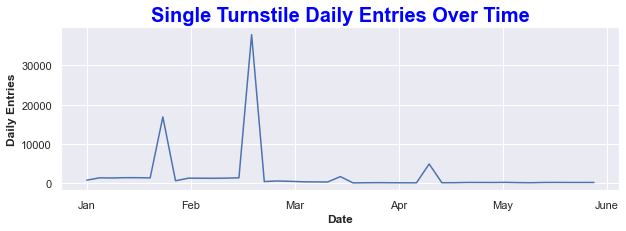

In [68]:
#plot the figure
plt.figure(figsize=(10,3))
plt.plot(single_ts['DATE'], single_ts['DAILY_ENTRIES'])
plt.title('Single Turnstile Daily Entries Over Time', fontsize = 20, weight = 'bold', color = 'blue');
plt.xlabel('Date', weight = 'bold')
plt.ylabel('Daily Entries', weight = 'bold');
ticks_x = np.linspace(0, 41, 6)
months = ['Jan','Feb','Mar','Apr','May','June']
plt.xticks(ticks_x, months);

#### Challenge 1.5
So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each CONTROLAREA/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby)

Distribution of daily turnstile entries:

/Users/willnobles/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAILY_ENTRIES', ylabel='Density'>

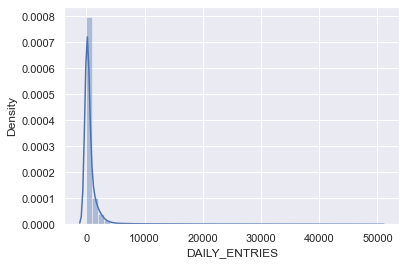

In [69]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 50000])

This is a right-skewed distribution (the mean is to the right of the median). It's good that there are no values less than 0 now, but it seems there are still entry values that are likely too extreme to be sensible.

Distribution of daily entries by station, for top 10 stations by volume:

In [70]:
#Change entries that bigger than median * 5 to median
def clean_daily_entries(row, median):
    counter = row['DAILY_ENTRIES']
    if counter > median*5:
        return median
    
    return counter

In [71]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(clean_daily_entries, axis=1, median=181)
turnstiles_daily['DAILY_ENTRIES'].describe()

count    201619.000000
mean        186.780824
std         196.299075
min           0.000000
25%          37.000000
50%         181.000000
75%         208.000000
max         905.000000
Name: DAILY_ENTRIES, dtype: float64

In [72]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/12/2020,1923.0
1,1 AV,01/13/2020,2777.0
2,1 AV,01/14/2020,2747.0
3,1 AV,01/15/2020,2789.0
4,1 AV,01/16/2020,2848.0


In [73]:
# then get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
226          FULTON ST
110              86 ST
46               23 ST
233    GRD CNTRL-42 ST
9               125 ST
59     34 ST-HERALD SQ
173           CANAL ST
68     42 ST-PORT AUTH
85               59 ST
Name: STATION, dtype: object

In [74]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]
stations_daily_top10

,STATION,DATE,DAILY_ENTRIES
369,125 ST,01/12/2020,17780.0
370,125 ST,01/13/2020,10114.0
371,125 ST,01/14/2020,8583.0
372,125 ST,01/15/2020,8164.0
373,125 ST,01/16/2020,7701.0
...,...,...,...
9586,GRD CNTRL-42 ST,06/01/2020,8902.0
9587,GRD CNTRL-42 ST,06/02/2020,9782.0
9588,GRD CNTRL-42 ST,06/03/2020,9011.0
9589,GRD CNTRL-42 ST,06/04/2020,9215.0


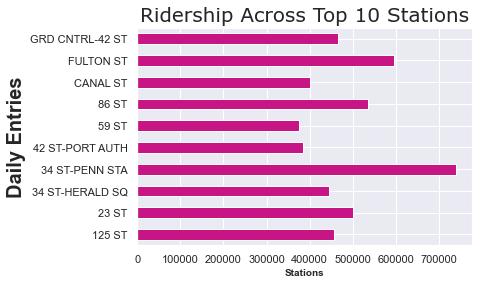

In [75]:
ridership = stations_daily_top10.groupby(['STATION'])['DAILY_ENTRIES'].sum()
my_colors = list('rgbkymc')
ridership.plot(kind='barh', color='mediumvioletred')
plt.title('Ridership Across Top 10 Stations', family='verdana', fontsize=20);
plt.xlabel('Stations', fontsize=10, weight='bold')
plt.ylabel('Daily Entries', fontsize = 20, weight = 'bold');
plt.savefig('top10ridership.svg')

Two key things we should notice from these quick EDA steps:

Using our knowledge of NYC, it doesn't seem right that these are the top 10 stations. Some are reasonable like grand central and times square, but is 23rd street really that popular? A next step here would be to dig into turnstiles in "23 ST" (hint: check the line names for different instances of 23 ST, is it really one station?)
There's still a clear outlier in daily traffic for Canal St, we should be able to figure out what's causing this by digging into it. Maybe our cleaning process is not quite enough yet (1 million is too large a cutoff!)

In [77]:
turnstiles_daily[(turnstiles_daily['STATION'] == 'CANAL ST') &
                 (turnstiles_daily['DAILY_ENTRIES'] > 905)].sort_values('DAILY_ENTRIES', ascending=False).head()

,C/A,UNIT,SCP,LINENAME,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES


In [78]:
turnstiles_daily.describe()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
count,2.016190e+05,2.016190e+05,201619.000000
mean,4.296167e+07,4.293308e+07,186.780824
std,2.193357e+08,2.192549e+08,196.299075
min,0.000000e+00,0.000000e+00,0.000000
25%,3.070585e+05,3.071950e+05,37.000000
50%,1.882306e+06,1.884828e+06,181.000000
75%,6.505078e+06,6.507020e+06,208.000000
max,2.128871e+09,2.128872e+09,905.000000
